In [52]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


## Creating x-y positions using a random distribution based on the bounds of the original IceCube coordinates

In [53]:
#used to set the range for random.uniform()
print(np.max(gen2_dom_x_positions))
print(np.min(gen2_dom_x_positions))
print(np.max(gen2_dom_y_positions))
print(np.min(gen2_dom_y_positions))

525.42
-570.9
463.72
-521.08


In [54]:
#using random.uniform()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates
index = 0
rand_x_positions = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-600., 550.)
        rand_x_positions.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_1 = [rand_x_positions[x:x+splitedSize] for x in range(0, len(rand_x_positions), splitedSize)]
#converts list to array
rand_dom_x_positions = np.asarray(rand_dom_x_list_1)

print(len(rand_dom_x_positions))
print(len(rand_dom_x_positions[0]))
#print(rand_dom_x_positions)

21
67


In [55]:
#using random.uniform()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-550., 500.)
        rand_y_positions.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_1 = [rand_y_positions[y:y+splitedSize] for y in range(0, len(rand_y_positions), splitedSize)]
#converts list to array
rand_dom_y_positions = np.asarray(rand_dom_y_list_1)

print(len(rand_dom_y_positions))
print(len(rand_dom_y_positions[0]))
#print(rand_dom_y_positions)


21
67


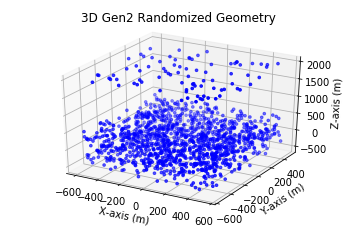

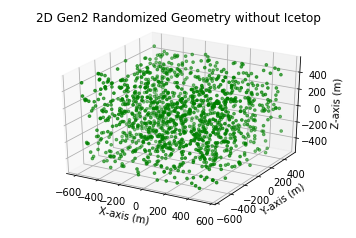

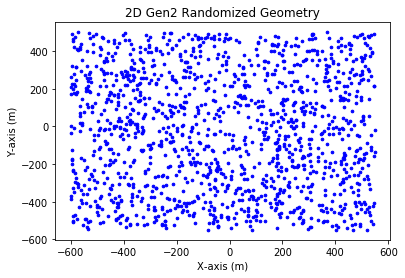

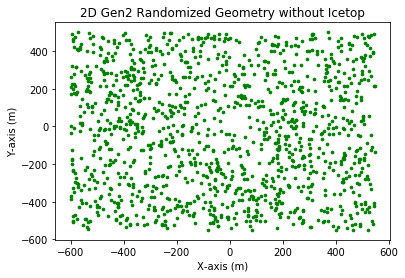

In [68]:
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("3D Gen2 Randomized Geometry")
ax.dist = 11
ax.scatter3D(rand_dom_x_positions, rand_dom_y_positions, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry without Icetop")
ax.dist = 11
ax.scatter3D(rand_dom_x_positions[:,0:61], rand_dom_y_positions[:,0:61], gen2_dom_z_positions[:,0:61], s= 7,c='green', depthshade=True)
plt.show()

ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry")
ax.scatter(rand_dom_x_positions, rand_dom_y_positions, s=7, c='blue')
plt.show()

#gen2 positions without icetop
ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax.scatter(rand_dom_x_positions[:,0:61], rand_dom_y_positions[:,0:61],s=7, c='green')
plt.show()

## Creating x-y positions using a triangular distribution based on the upper and lower bounds of the original IceCube coordinates 

In [57]:
#using random.triangular()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_2 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.triangular(-600., 550.)
        rand_x_positions_2.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_2 = [rand_x_positions_2[x:x+splitedSize] for x in range(0, len(rand_x_positions_2), splitedSize)]
#converts list to array
rand_dom_x_positions_2 = np.asarray(rand_dom_x_list_2)

print(len(rand_dom_x_positions_2))
print(len(rand_dom_x_positions_2[0]))
#print(rand_dom_x_positions)

21
67


In [58]:
#using random.triangular()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_y_positions_2 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.triangular(-600., 550.)
        rand_y_positions_2.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_2 = [rand_y_positions_2[x:x+splitedSize] for x in range(0, len(rand_y_positions_2), splitedSize)]
#converts list to array
rand_dom_y_positions_2 = np.asarray(rand_dom_y_list_2)

print(len(rand_dom_y_positions_2))
print(len(rand_dom_y_positions_2[0]))
#print(rand_dom_y_positions)

21
67


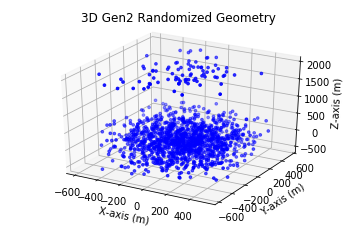

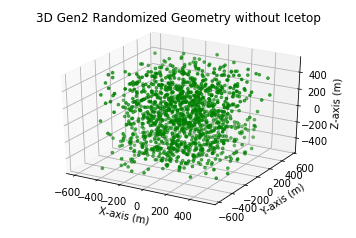

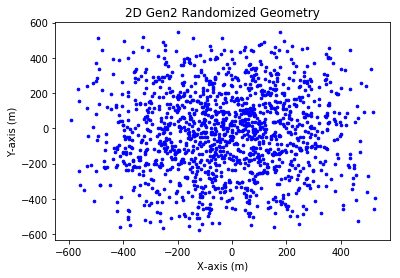

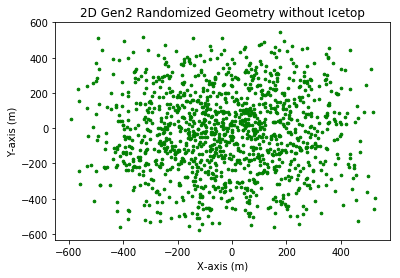

In [67]:
#using random.triangular()

ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("3D Gen2 Randomized Geometry")
ax.dist = 11
ax.scatter3D(rand_dom_x_positions_2, rand_dom_y_positions_2, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("3D Gen2 Randomized Geometry without Icetop")
ax.dist = 11
ax.scatter3D(rand_dom_x_positions_2[:,0:61], rand_dom_y_positions_2[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry")
ax.scatter(rand_dom_x_positions_2, rand_dom_y_positions_2, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax.scatter(rand_dom_x_positions_2[:,0:61], rand_dom_y_positions_2[:,0:61], s =7, c='green')
plt.show()

## Creating x-y positions using a gaussian distribution based on the average and standard deviation of the original IceCube coordinates excluding Icetop

In [61]:
print(np.std(gen2_dom_x_positions[:,0:61]))
print(np.std(gen2_dom_y_positions[:,0:61]))
print(np.average(gen2_dom_x_positions[:,0:61]))
print(np.average(gen2_dom_y_positions[:,0:61]))

303.7535091613165
292.64916272585197
-28.50023419203746
-15.591569086651022


In [62]:
print(random.gauss(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61])))
print(random.gauss(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61])))

400.5851261825966
-366.96361716946996


In [63]:
#using random.gauss()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_3 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.gauss(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))
        rand_x_positions_3.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_3 = [rand_x_positions_3[x:x+splitedSize] for x in range(0, len(rand_x_positions_3), splitedSize)]
#converts list to array
rand_dom_x_positions_3 = np.asarray(rand_dom_x_list_3)

print(len(rand_dom_x_positions_3))
print(len(rand_dom_x_positions_3[0]))
#print(rand_dom_x_positions_3)

21
67


In [64]:
#using random.gauss()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions_3 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.gauss(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61]))
        rand_y_positions_3.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_3 = [rand_y_positions_3[y:y+splitedSize] for y in range(0, len(rand_y_positions_3), splitedSize)]
#converts list to array
rand_dom_y_positions_3 = np.asarray(rand_dom_y_list_3)

print(len(rand_dom_y_positions_3))
print(len(rand_dom_y_positions_3[0]))
#print(rand_dom_y_positions_3)

21
67


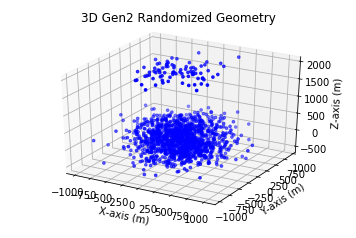

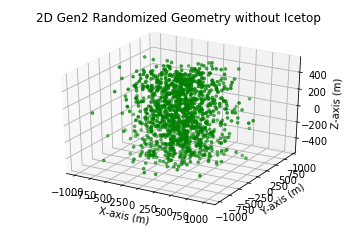

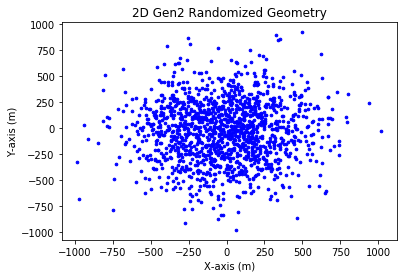

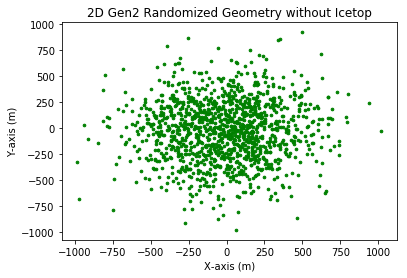

In [69]:
#using random.gauss()

ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("3D Gen2 Randomized Geometry")
ax.dist = 11
ax.scatter3D(rand_dom_x_positions_3, rand_dom_y_positions_3, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax = plt.axes(projection='3d')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry without Icetop")
ax.dist = 11
ax.scatter3D(rand_dom_x_positions_3[:,0:61], rand_dom_y_positions_3[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry")
ax.scatter(rand_dom_x_positions_3, rand_dom_y_positions_3, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax = plt.axes()
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax.scatter(rand_dom_x_positions_3[:,0:61], rand_dom_y_positions_3[:,0:61], s =7, c='green')
plt.show()